# Import Packages and Dataset 

In [ ]:
import pathlib
from PIL import Image, ImageDraw

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#find paths for loading and saving images and labels
#training set
#path_to_images_dir = pathlib.Path('drive/My Drive/Colab Notebooks/Master Thesis/Dataset_large/train/images/')
#path_to_save_to = pathlib.Path('drive/My Drive/Colab Notebooks/Master Thesis/Dataset_large/train/images_cropped/')
#image_paths = sorted(list(path_to_images_dir.glob("*.png")))
#path_to_labels_dir = pathlib.Path('drive/My Drive/Colab Notebooks/Master Thesis/Dataset_large/train/labels/')
#labels_paths = sorted(list(path_to_labels_dir.glob("*.txt")))

#validation set
#path_to_images_dir = pathlib.Path('drive/My Drive/Colab Notebooks/Master Thesis/Dataset_large/valid/images/')
#path_to_save_to = pathlib.Path('drive/My Drive/Colab Notebooks/Master Thesis/Dataset_large/valid/images_cropped/')
#image_paths = sorted(list(path_to_images_dir.glob("*.png")))
#path_to_labels_dir = pathlib.Path('drive/My Drive/Colab Notebooks/Master Thesis/Dataset_large/valid/labels/')
#labels_paths = sorted(list(path_to_labels_dir.glob("*.txt")))

#test set
path_to_images_dir = pathlib.Path('drive/My Drive/Colab Notebooks/Master Thesis/Dataset_large/test/images/')
path_to_save_to = pathlib.Path('drive/My Drive/Colab Notebooks/Master Thesis/Dataset_large/test/images_cropped_manual/')
image_paths = sorted(list(path_to_images_dir.glob("*.png")))
path_to_labels_dir = pathlib.Path('drive/My Drive/Colab Notebooks/Master Thesis/Dataset_large/test/labels/')
labels_paths = sorted(list(path_to_labels_dir.glob("*.txt")))


In [ ]:
#connect images to corresponding label files

images_with_labels_paths_dict = {}
for image_path in image_paths:
  name_without_extension = image_path.name[:-4]
  images_with_labels_paths_dict[name_without_extension] = {"image_path": image_path}
for label_path in labels_paths:
  name_without_extension = label_path.name[:-4]
  images_with_labels_paths_dict[name_without_extension]["label_path"] = label_path
images_with_labels_paths = list(images_with_labels_paths_dict.values())

In [ ]:
#check that the length of the paths is correct

assert len(images_with_labels_paths) == len(image_paths)
assert len(images_with_labels_paths) == len(labels_paths)
for paths in images_with_labels_paths:
  assert len(paths) == 2

# Bounding Box and Cropping Functions

In [ ]:
#function for reading label and bounding box positions from file

def read_labels(label_string):
  lines = label_string.split("\n")
  res = []
  for line in lines:
    elems = line.split(" ")
    assert len(elems) == 5
    label = int(elems[0])
    bb = [float(elem) for elem in elems[1:]]
    res.append((label, bb))
  return res

In [ ]:
#function for displaying image with bounding boxes and labels

def show_bounding_boxes_for_image(paths):
  image_path = paths["image_path"]
  label_path = paths["label_path"]
  img = Image.open(image_path)

  with open(label_path, "r") as f:
    label_string = f.read()

  labels = read_labels(label_string)

  draw = ImageDraw.Draw(img)

  for label, bb in labels:
    px_center, py_center, pwidth, pheight = bb

    x_center = img.width * px_center
    y_center = img.height * py_center
    width = img.width * pwidth
    height = img.height * pheight

    draw.rectangle((x_center - width / 2, y_center - height / 2, x_center + width / 2, y_center + height / 2), outline = ("yellow" if label == 0 else "red")) 
    draw.text((x_center, y_center), ("Healthy" if label == 0 else "Loser"), align="center")

  return img

In [ ]:
#function for cropping bounding boxes into new images 

def crop_images(paths):
  image_path = paths["image_path"]
  label_path = paths["label_path"]
  img = Image.open(image_path)

  with open(label_path, "r") as f:
    label_string = f.read()

  labels = read_labels(label_string)

  cropped_images_wl = [] 

  for label, bb in labels:
    px_center, py_center, pwidth, pheight = bb

    x_center = img.width * px_center
    y_center = img.height * py_center
    width = img.width * pwidth
    height = img.height * pheight

    cropped_img = img.crop((x_center - width / 2, y_center - height / 2, x_center + width / 2, y_center + height / 2))

    cropped_images_wl.append((label, cropped_img))

  return sorted(cropped_images_wl, key = lambda cropped_image_wl: cropped_image_wl[0])

In [ ]:
#display the amount of images 

len(images_with_labels_paths)

21

# Display Images with Bounding Boxes and Cropped Images

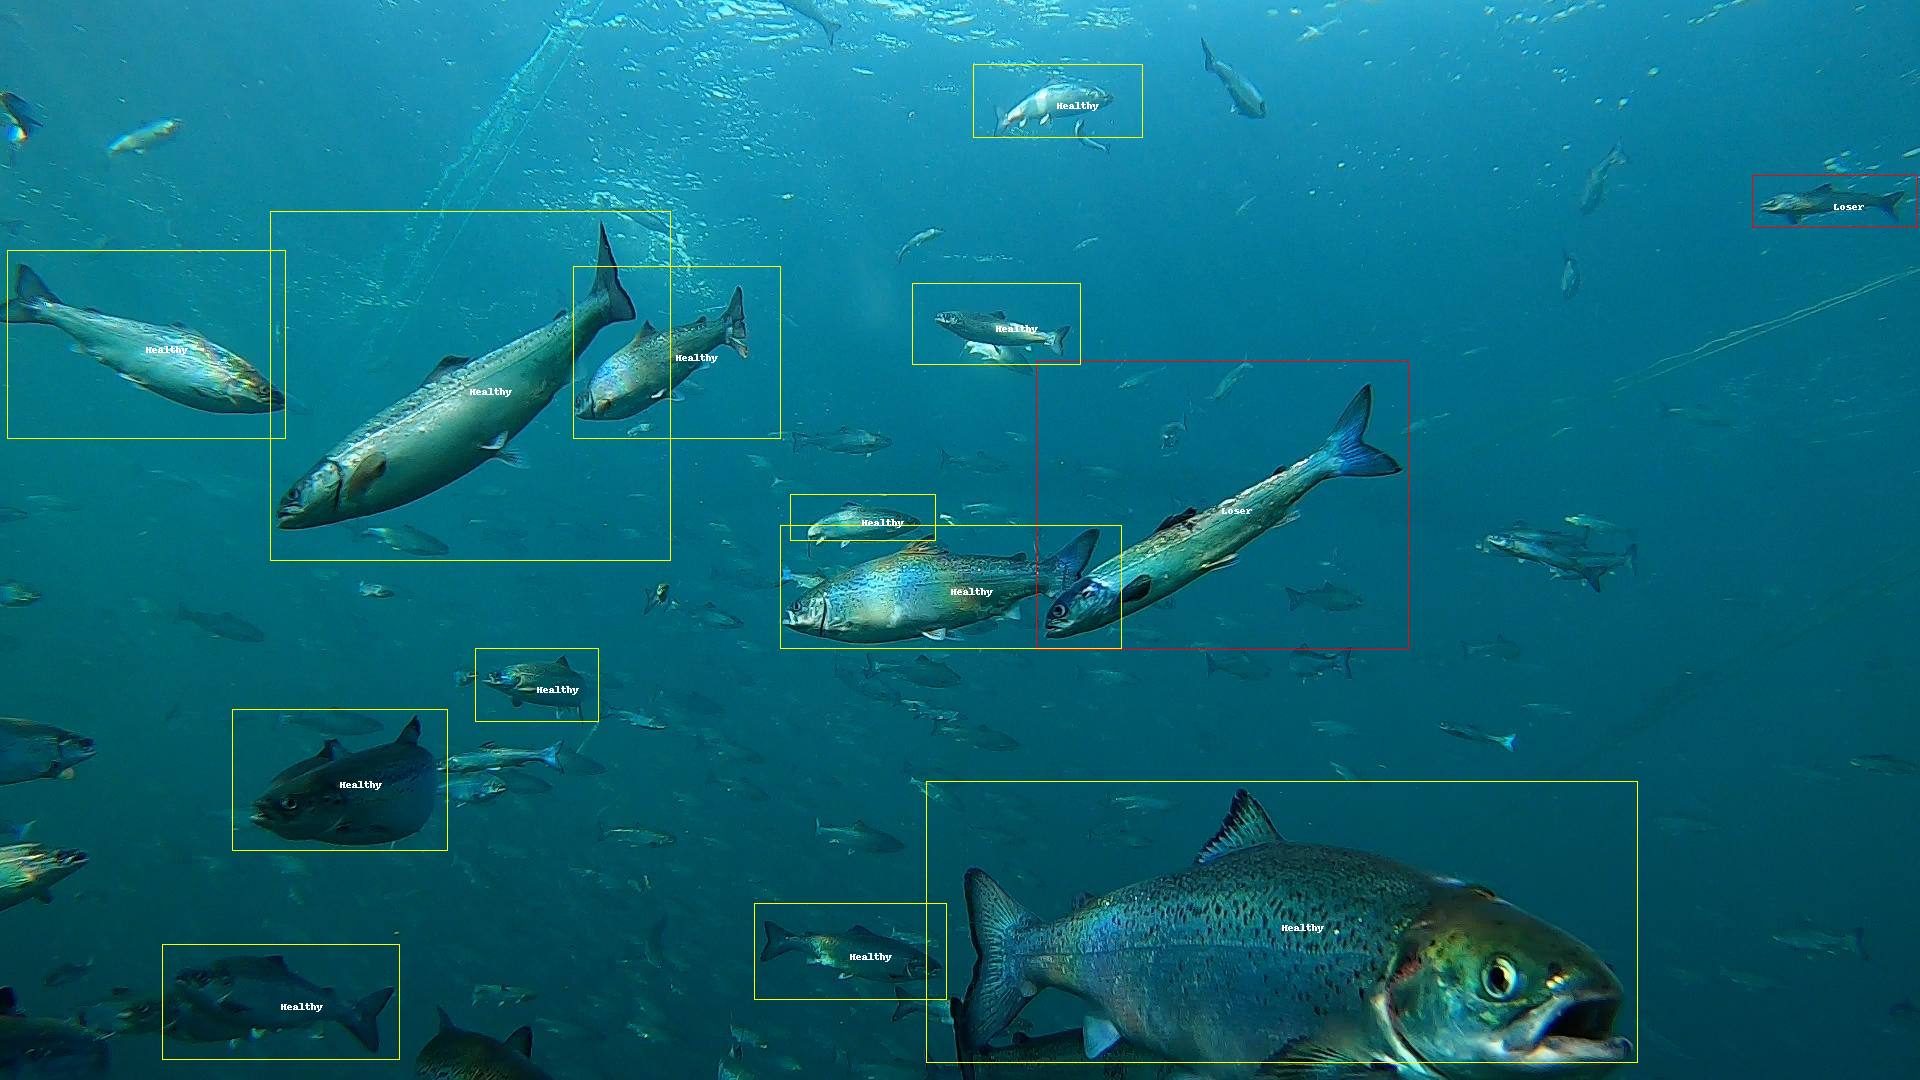

In [ ]:
show_bounding_boxes_for_image(images_with_labels_paths[16])

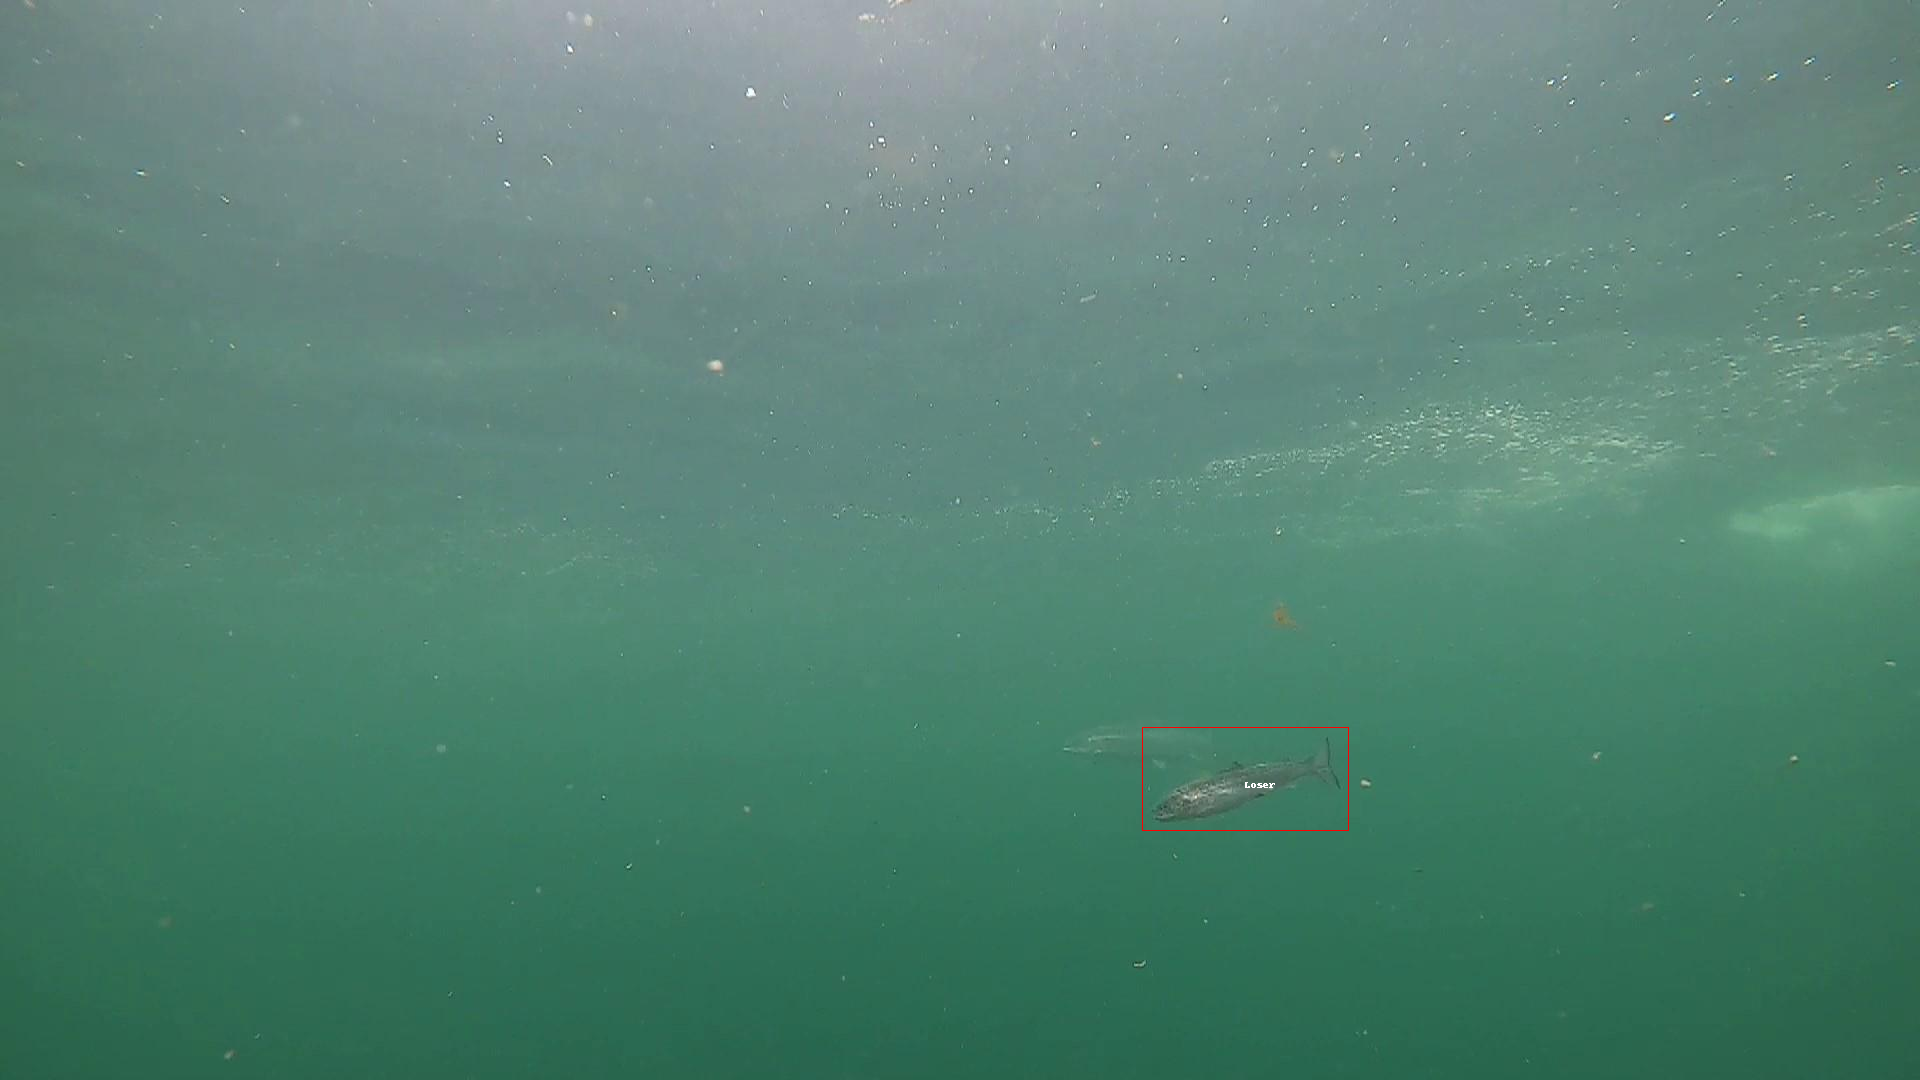

In [ ]:
#display an image with bounding boxes and labels

show_bounding_boxes_for_image(images_with_labels_paths[5])

Healthy fish below


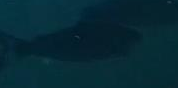

Healthy fish below


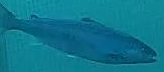

Healthy fish below


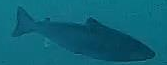

Healthy fish below


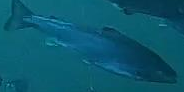

Healthy fish below


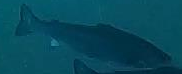

Healthy fish below


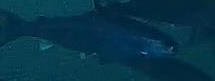

Healthy fish below


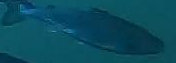

Healthy fish below


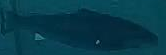

Healthy fish below


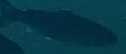

Healthy fish below


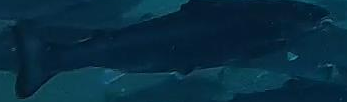

Healthy fish below


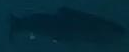

Healthy fish below


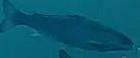

Healthy fish below


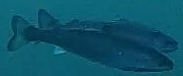

Healthy fish below


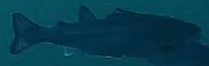

Healthy fish below


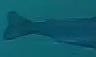

Healthy fish below


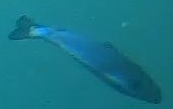

Healthy fish below


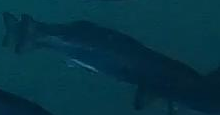

Healthy fish below


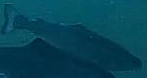

Healthy fish below


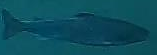

Healthy fish below


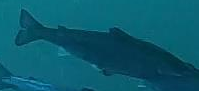

Healthy fish below


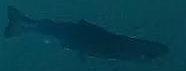

Healthy fish below


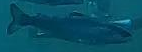

Healthy fish below


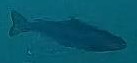

Healthy fish below


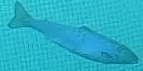

Healthy fish below


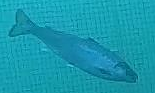

Healthy fish below


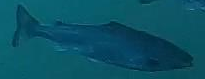

Healthy fish below


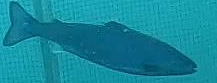

Healthy fish below


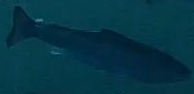

Healthy fish below


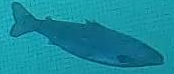

Healthy fish below


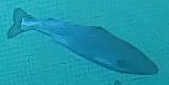

Healthy fish below


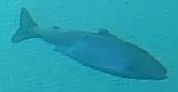

Healthy fish below


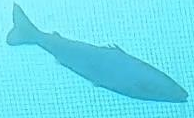

Healthy fish below


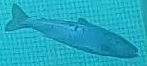

Healthy fish below


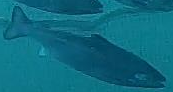

Healthy fish below


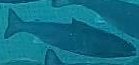

Healthy fish below


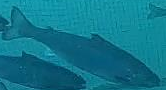

Healthy fish below


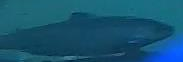

Healthy fish below


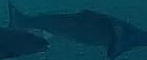

Healthy fish below


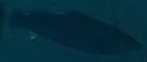

Healthy fish below


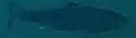

Healthy fish below


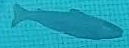

Healthy fish below


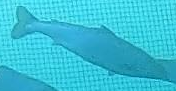

Healthy fish below


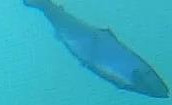

Healthy fish below


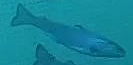

Healthy fish below


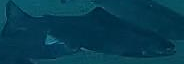

Loser fish below


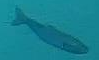

Loser fish below


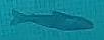

In [ ]:
#display cropped bounding box images with corresponding label

for label, cropped_image in crop_images(images_with_labels_paths[14]):
  print(("Healthy fish below" if label == 0 else "Loser fish below"))
  display(cropped_image)

# Saving the Cropped Images

In [ ]:
#save cropped bounding box images in a folder

imageCounter = 1
for paths in images_with_labels_paths:
  for label, img in crop_images(paths):
    img.save(path_to_save_to.joinpath("fish" + str(imageCounter) + "label" + ("1" if label == 0 else "0") + ".jpg"))
    imageCounter += 1